In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
import copy

In [2]:
wine_df_pd = pd.read_csv(r'.\white_wine_quality.csv')
wine_df = np.asarray(wine_df_pd)

In [3]:
wine_df_pd.columns = ['alcohol', 'malic_acid', 'ash', 'alkalinity_of_ash', 
              'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'hue', 'class']

In [4]:
print(wine_df_pd.keys())

Index(['alcohol', 'malic_acid', 'ash', 'alkalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'hue', 'class'],
      dtype='object')


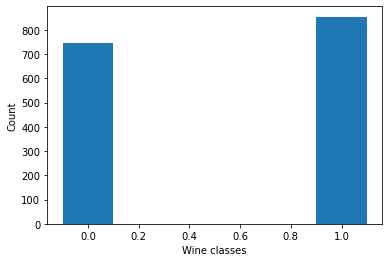

In [5]:
plt.hist(wine_df[:,-1], bins =[-0.1, 0.1, 0.9, 1.1])
plt.xlabel('Wine classes')
plt.ylabel('Count')
plt.show()

In [6]:
labels = ['alcohol', 'malic_acid', 'ash', 'alkalinity_of_ash', 
              'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'hue']

In [7]:
class0 = wine_df[wine_df[:,10] == 0]
class1 = wine_df[wine_df[:,10] == 1]

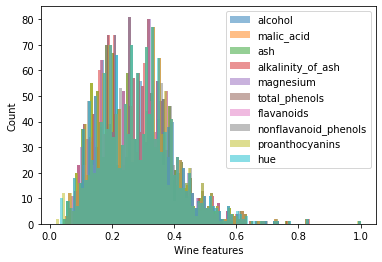

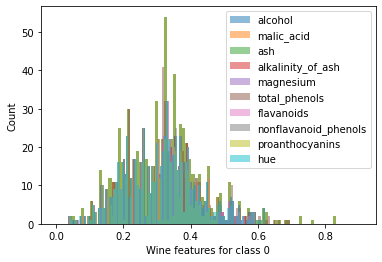

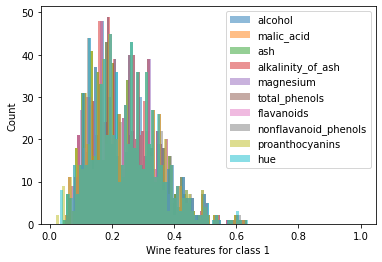

In [8]:
for i in range(len(wine_df[0])-1):
  bins = np.linspace(min(wine_df[i,:]), max(wine_df[i,:]), 100)                 #100 sample for each feature divided equaly between maximum and minimum values for each feature 
  plt.hist(wine_df[:,1], bins, alpha = 0.5, label = (labels[i]))
  plt.xlabel('Wine features')
  plt.ylabel('Count')
  plt.legend(loc='upper right')
plt.show()

for i in range(len(class0[0])-1):
  bins = np.linspace(min(class0[i,:]), max(class0[i,:]), 100)                 #100 sample for each feature divided equaly between maximum and minimum values for each feature 
  plt.hist(class0[:,1], bins, alpha = 0.5, label = (labels[i]))
  plt.xlabel('Wine features for class 0')
  plt.ylabel('Count')
  plt.legend(loc='upper right')
plt.show()

for i in range(len(class1[0])-1):
  bins = np.linspace(min(class1[i,:]), max(class1[i,:]), 100)                 #100 sample for each feature divided equaly between maximum and minimum values for each feature 
  plt.hist(class1[:,1], bins, alpha = 0.5, label = (labels[i]))
  plt.xlabel('Wine features for class 1')
  plt.ylabel('Count')
  plt.legend(loc='upper right')
plt.show()

In [9]:
average_of_features = np.mean(wine_df[:,:10], axis=0)
print(average_of_features)
average_of_class_0 = np.mean(class0[:,:10], axis=0)
average_of_class_1 = np.mean(class1[:,:10], axis=0)

[0.32920029 0.27932811 0.27112015 0.11228322 0.1259993  0.20949629
 0.14302976 0.4898689  0.44968577 0.19653279]


average of features for all data


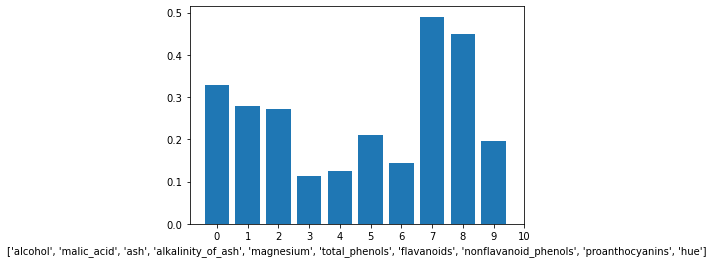

average of features for class 0 data


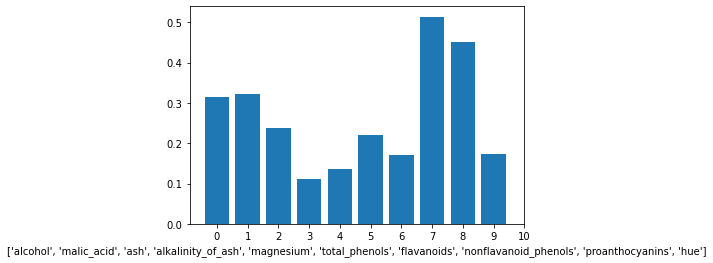

average of features for class 1 data


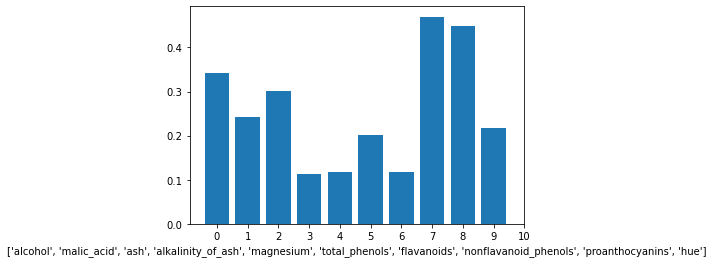

In [10]:
print("average of features for all data")
features = np.arange(0,11)
plt.bar(range(len(average_of_features)), average_of_features)
plt.xticks(range(len(features)), features)
plt.xlabel(labels)
plt.show()

print("average of features for class 0 data")
features = np.arange(0,11)
plt.bar(range(len(average_of_class_0)), average_of_class_0)
plt.xticks(range(len(features)), features)
plt.xlabel(labels)
plt.show()

print("average of features for class 1 data")
features = np.arange(0,11)
plt.bar(range(len(average_of_class_1)), average_of_class_1)
plt.xticks(range(len(features)), features)
plt.xlabel(labels)
plt.show()

Standard deviation for data


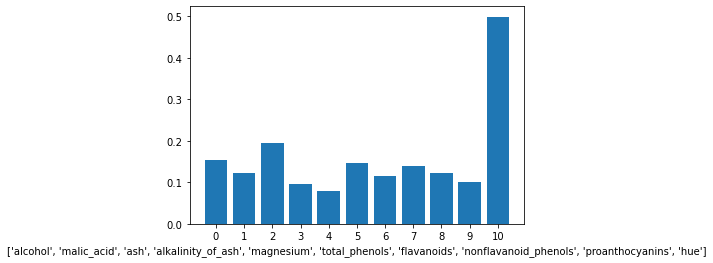

In [11]:
std = np.std(wine_df, axis = 0)
print("Standard deviation for data")
features = np.arange(0,11)
plt.bar(range(len(std)), std)
plt.xticks(range(len(features)), features)
plt.xlabel(labels)
plt.show()

In [12]:
class Model:
    
    def __init__(self, data):
        np.random.seed(4)
        np.random.shuffle(data)                    
        self.all = np.asarray(data)
        self.data = data[:,:-1]
        self.target = data[:,-1].reshape(-1,1)

    def accu_eval(predicted_labels, true_labels):
        predicted_labels = np.array(predicted_labels)
        true_labels = np.array(true_labels)
        comparison = predicted_labels == true_labels
        comparison = comparison + 0
        return np.mean(comparison)
    
    def divide_data(df):
        shuffle = copy.deepcopy(df)
        N,M = shuffle.shape 
        train_size = int(0.7*N)
        test_size = N - train_size
        train = shuffle[0:train_size-1,:]
        test = shuffle[train_size:,:]
        return train, test
    
    def basis_expansion(self, X_array, trainig_alg=0, order=1, feature_number = 0):
        for i in range (order-1 ):
          Z = X_array[:,feature_number].reshape(-1,1) ** (i+1)
          X_array = np.hstack((X_array,Z))
        return X_array
    
#     def fit(self, x_train, y_train):
       
#         x,y = self.sorting_for_DA(x_train,y_train)
#         num_targets = np.unique(y, return_counts=True)
#         N0 = num_targets[1][0]
#         N1 = num_targets[1][1]
#         Py0 = N0/(N1+N0)
#         Py1 = N1/(N1+N0)

#         mu0 = (x[y[:,0]== 0,:]).mean(0)
#         mu1 = (x[y[:,0]== 1,:]).mean(0)
#         mu0_r = np.tile(mu0, (N0,1))
#         mu1_r = np.tile(mu1, (N1,1))
#         mu = np.concatenate((mu0_r, mu1_r), axis = 0)

#         sigma = (x - mu).T@(x - mu)/(N0+N1 - 2)
#         sigma_inv = np.linalg.pinv(sigma)
#         return Py0, Py1, mu0, mu1, sigma_inv
    def fit(self, X, y):
        # Compute the mean of each class
        class_means = np.array([np.mean(X[y == i], axis=0) for i in np.unique(y)])

        # Compute the overall mean
        overall_mean = np.mean(X, axis=0)

        # Compute the within-class scatter matrix
        S_W = np.sum([(X[y == i] - class_means[i]).T @ (X[y == i] - class_means[i]) for i in np.unique(y)], axis=0)

        # Compute the between-class scatter matrix
        S_B = np.sum([len(X[y == i]) * (class_means[i] - overall_mean).reshape(-1, 1) @ (class_means[i] - overall_mean).reshape(1, -1) for i in np.unique(y)], axis=0)

        # Compute the eigenvalues and eigenvectors of S_W^-1 @ S_B
        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W) @ S_B)

        # Sort the eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Project the data onto the eigenvectors
        X_lda = X @ eigenvectors[:, :len(np.unique(y))-1]

        return X_lda
    
#     def predict(self, Py0, Py1, mu0, mu1, sigma_inv, X_test, threshold=0.5):

#         y_predict = []
#         for i in range (X_test.shape[0] ):
#           a = math.log(Py1/Py0) - 0.5*mu1.T@sigma_inv@mu1 + 0.5*mu0.T@sigma_inv@mu0 + X_test[i].T@sigma_inv@(mu1-mu0)
#           sigmoid = 1/(1+np.exp(-a))
#           if sigmoid>=threshold:
#             y_predict.append(1)
#           else:
#             y_predict.append(0)
#         return y_predict
    def predict(self, X, X_lda, y, k=1):
        # Compute the mean of each class in the LDA space
        class_means_lda = np.array([np.mean(X_lda[y == i], axis=0) for i in np.unique(y)])

        # Compute the distances of the new data points to the class means in the LDA space
        distances = np.array([np.linalg.norm(X_lda - class_means_lda[i], axis=1) for i in range(len(np.unique(y)))])

        # Assign the new data points to the class with the smallest distance
        y_pred = np.argmin(distances, axis=0)

        return y_pred
    
    def fitQDA(x, Y):
        """
        Fits a Quadratic Discriminant Analysis model on the given dataset x and target variable Y.

        Parameters:
        x (array-like): The input dataset of shape (n_samples, n_features).
        Y (array-like): The target variable of shape (n_samples,).

        Returns:
        pi (ndarray): The prior probability of each class.
        mu (ndarray): The mean vector of each class.
        sigma (ndarray): The covariance matrix of each class.
        """

    # Find the number of classes in the target variable Y
        classes = np.unique(Y)
        n_classes = len(classes)

        # Compute the prior probability of each class
        pi = np.array([np.mean(Y == c) for c in classes])

        # Compute the mean vector of each class
        mu = np.array([np.mean(x[Y == c], axis=0) for c in classes])

        # Compute the covariance matrix of each class
        sigma = np.zeros((n_classes, x.shape[1], x.shape[1]))
        for i, c in enumerate(classes):
            sigma[i] = np.cov(x[Y == c], rowvar=False)

        return pi, mu, sigma
    
    def predictQDA(x, pi, mu, sigma):
        """
        Performs Quadratic Discriminant Analysis prediction on the given dataset x using the QDA model parameters.

        Parameters:
        x (array-like): The input dataset of shape (n_samples, n_features).
        pi (ndarray): The prior probability of each class.
        mu (ndarray): The mean vector of each class.
        sigma (ndarray): The covariance matrix of each class.

        Returns:
        y_pred (ndarray): The predicted target variable of shape (n_samples,).
        """

    # Find the number of classes and input samples
        n_classes = len(pi)
        n_samples = x.shape[0]

        # Initialize the output array for predicted labels
        y_pred = np.zeros(n_samples)

        # Compute the discriminant function for each class
        for i in range(n_classes):
            # Compute the log-determinant and inverse of the covariance matrix for class i
            det_sigma = np.linalg.slogdet(sigma[i])[1]
            inv_sigma = np.linalg.inv(sigma[i])

            # Compute the quadratic term of the discriminant function for class i
            Q_i = -0.5 * np.sum(np.dot((x - mu[i]), inv_sigma) * (x - mu[i]), axis=1)

            # Compute the linear term of the discriminant function for class i
            L_i = np.dot(x, np.dot(inv_sigma, mu[i])) - 0.5 * np.dot(mu[i], np.dot(inv_sigma, mu[i])) + np.log(pi[i])

            # Compute the discriminant function for class i
            g_i = Q_i + L_i

            # Assign the predicted label to the class with the highest discriminant function value
            y_pred[g_i == np.max(g_i)] = i

        return y_pred
    
    def k_fold_cross(self, X_complete, y_complete, trainig_alg=0):
        """
        k_fold_cross performs k folds cross validation algrothim, then performs fitting, and predicting for each fold
                     and returning the accuracy

        Parameters
        ----------
        X_complete: input data set.
        y_complete: input target set.
        trainig_alg: trainig algrothim, 0:GD, 1:LDA, 2:QDA.
        l_rate: learning rate to adjust the update step for GD algrothim.
          _lambda: regularization parameter used for Lasso regression.
        threshold: threshold point for algrothim prediction.
          Returns
        -------
        accuracy_mean: mean value of accuracy
        accuracy_list: accuracy of each fold
        algorithm: trainig algrothim, 0:GD, 1:LDA, 2:QDA.
        """ 
        k=10
        print(trainig_alg)
        accuracy_list =  []
        fold_size = int(len(X_complete)/k)
        number_examples_rounded = fold_size*k   #in some cases the examples cannot be divided equally for all folds
        for i in range(0, number_examples_rounded, fold_size): 
          if(i == number_examples_rounded-fold_size): #Last partition condition ==>in case len(X_complete)>number_examples_rounded, last partition takes all remaining data to the end of the set
            X_train=X_complete[:i,:]
            X_val=X_complete[i:,:]
            y_train=y_complete[:i,:]
            y_val=y_complete[i:,:]
          else:
            X_train=np.delete(X_complete, slice(i,i+fold_size),0) #delete validation fold from training set using slice command 
            X_val=X_complete[i:i+fold_size,:]  
            y_train=np.delete(y_complete,slice(i,i+fold_size),0)
            y_val=y_complete[i:i+fold_size,:]

          if(trainig_alg == 0):
            algorithm = "LDA"
            X_lda = self.fit(X_train, y_train)
            y_predict = self.predict(X_train, X_lda, y_train)
          if(trainig_alg == 1):
            algorithm = "QDA"
            pi, mu, sigma = self.fitQDA(X_train, y_train )
            y_predict = self.predictQDA(X_train, pi, mu, sigma)
    
          accuracy = self.accu_eval(y_predict, y_val)
          accuracy_list.append(accuracy) 
        accuracy_mean = np.mean(accuracy_list)
        return accuracy_mean, accuracy_list, algorithm

In [13]:
dataset = wine_df
print(dataset)
print("hiiiii")
model = Model(dataset) #lp_data aq_data
x = []
y = []
z = []
X_complete = []
X_clone = []
best_lr = 0
max_mean = 0
X_clone = copy.deepcopy(model.data)
X_complete = model.basis_expansion(X_clone, 0)
for i in range(-5,1,1):
  l_rate = 10**i
  start = time.time()
  print("h")
  mean, by_fold, algorithm_used = model.k_fold_cross(X_complete, model.target)
  print(algorithm_used)
  end = time.time()
  if(mean >= max_mean):
    best_lr = l_rate
    max_mean = mean
  x.append(l_rate)
  z.append(end-start)
  y.append(mean)

print("l_rate ", x)
plt.plot(x,y)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()

plt.plot(x,z)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Simulation Time [s]')
plt.show()
print(best_lr, max(y))

[[0.19469  0.34932  0.07     ... 0.5748   0.13174  1.      ]
 [0.30088  0.20548  0.17     ... 0.43307  0.16766  1.      ]
 [0.30088  0.20548  0.17     ... 0.43307  0.16766  1.      ]
 ...
 [0.23894  0.58904  0.05     ... 0.44882  0.13174  0.      ]
 [0.47788  0.39041  0.11     ... 0.11024  0.083832 0.      ]
 [0.18584  0.39726  0.08     ... 0.54331  0.11377  0.      ]]
hiiiii
h
0


IndexError: boolean index did not match indexed array along dimension 1; dimension is 10 but corresponding boolean dimension is 1